In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from math import log

import random
import numpy as np

from method import func
from method import addEdge
from method import JC
from method import CN
from method import PA
from method import AA






In [24]:
G =nx.Graph()


# G.add_edge('0', '1', weight=0.6)
# G.add_edge('0', '2', weight=0.2)
# G.add_edge('1','3', weight=0.1)
# G.add_edge('2 ','4', weight=0.7)
# G.add_edge('3', '5', weight=0.9)
# G.add_edge('7', '8', weight=0.2)
# G.add_edge('6', '7', weight=0.7)
# G.add_edge('5', '2', weight=0.5)
# G.add_edge('8', '4', weight=0.7)
# G.add_edge('9', '3', weight=0.6)
# G.add_edge('6', '3', weight=0.4)
# G.add_edge('4', '3', weight=0.3)
# G = nx.karate_club_graph()

# # dataset lesmis
# //////////////////////////////////////////////////////////////////////////////////////dataset  
# edges = nx.read_gml('dataset/lesmis.gml')
# G.add_edges_from(edges.edges(data=True))
# name_dataset="lesmis"

# //////////////////////////////////////////////////////////////////////////////////////dataset King_James
# G = nx.read_edgelist('dataset/King_James.txt', nodetype=int, data=(('weight',float),))
# G.edges(data=True)
# name_dataset="King_James"

# //////////////////////////////////////////////////////////////////////////////////////dataset NetScience
G = nx.read_edgelist('dataset/NetScience.txt', nodetype=int, data=(('weight',float),))
G.edges(data=True)
name_dataset="NetScience"

# //////////////////////////////////////////////////////////////////////////////////////dataset Adolescent
# G = nx.read_edgelist('dataset/Adolescent.txt', nodetype=int, data=(('weight',float),))
# name_dataset="Adolescent"
# nx.draw(G, with_labels = True)

print("number nodes G: ",len(G.nodes()),"\n number edges G: ", len(G.edges()))
# len(G.edges(data=True))

number nodes G:  1461 
 number edges G:  2742


In [25]:
arrayGraph=nx.to_numpy_matrix(G,sorted(G.nodes()))
len(arrayGraph)
G = nx.from_numpy_matrix(arrayGraph)
print(len(G.edges(data=True)))

2742


In [26]:
G_weight_main=list(G.edges(data=True))
G_weight_reverse= addEdge.reverse_weight_edges(G_weight_main)

sum Min and Max weight: 4.8026316


**JC**

In [36]:
algoritm_name="GMC"
# algoritm_name="ALC"

In [37]:
ebunch = nx.edges(G)  
JC_list= list(JC.Jaccard_Coefficient_index(G, G_weight_reverse, ebunch))
JC_list_sorted=sorted(JC_list, reverse=True, key=lambda x: x[2])
JC_list_mod, JC_list_per, JC_list_cov = func.remove_anomal_edge(G, JC_list_sorted, algoritm_name)

2742
numbers remove edges:  274
2468


**CN**

In [38]:
CN_list = CN.NLP_CN(G, G_weight_reverse)
CN_list_sorted=sorted(CN_list, reverse=True, key=lambda x: x[2])
CN_list_mod, CN_list_per, CN_list_cov = func.remove_anomal_edge(G, CN_list_sorted, algoritm_name)

2742
numbers remove edges:  274
2468


**PA**

In [39]:
PA_list= list(PA.preferential_attachment_index(G, G_weight_reverse,ebunch))
PA_list_sorted=sorted(PA_list, reverse=True, key=lambda x: x[2])
PA_list_mod, PA_list_per, PA_list_cov = func.remove_anomal_edge(G, PA_list_sorted, algoritm_name)

2742
numbers remove edges:  274
2468


**AA**

In [40]:

AA_lsit=list(AA.adamic_adar_index(G, G_weight_reverse, ebunch))
AA_lsit_sorted=sorted(AA_lsit, reverse=True, key=lambda x: x[2])
AA_list_mod, AA_list_per, AA_list_cov = func.remove_anomal_edge(G, AA_lsit_sorted, algoritm_name)

2742
numbers remove edges:  274
2468


In [45]:
print(algoritm_name)

GMC


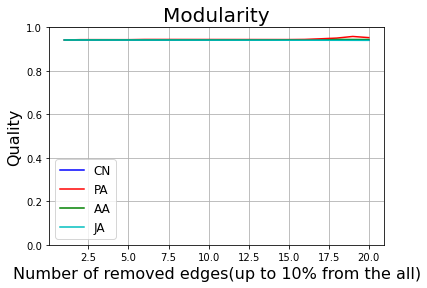

In [46]:
title_name = "Modularity"
func.plot_result(CN_list_mod,PA_list_mod, AA_list_mod,JC_list_mod, title_name, "mod_"+name_dataset)

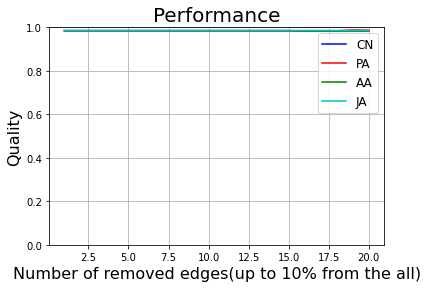

In [47]:
title_name = "Performance"
func.plot_result(CN_list_per,PA_list_per, AA_list_per,JC_list_per, title_name, "per_"+name_dataset)

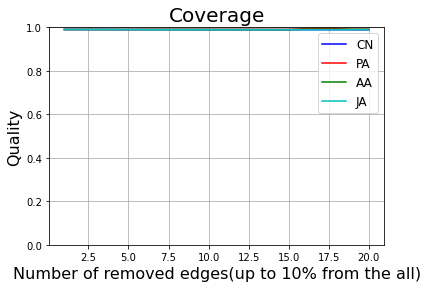

In [48]:
title_name = "Coverage"
func.plot_result(CN_list_cov,PA_list_cov, AA_list_cov,JC_list_cov, title_name, "cov_"+name_dataset)

In [13]:
# func.plot_result(JC_list_cov,JC_list_cov, JC_list_cov,JC_list_cov, algoritm_name)

In [14]:
CN_list_cov

[0.7559055118110236,
 0.7430830039525692,
 0.746031746031746,
 0.8047808764940239,
 0.756,
 0.7590361445783133,
 0.717741935483871,
 0.7894736842105263,
 0.7886178861788617,
 0.763265306122449,
 0.7377049180327869,
 0.7942386831275721,
 0.7933884297520661,
 0.7219917012448133,
 0.7322175732217573,
 0.7257383966244726,
 0.8893617021276595,
 0.776824034334764,
 0.7532467532467533,
 0.8165938864628821]

In [15]:
PA_list_cov

[0.7283464566929134,
 0.7312252964426877,
 0.8095238095238095,
 0.7808764940239044,
 0.78,
 0.7871485943775101,
 0.7701612903225806,
 0.7732793522267206,
 0.7804878048780488,
 0.7714285714285715,
 0.7622950819672131,
 0.9300411522633745,
 0.7603305785123967,
 0.7883817427385892,
 0.7866108786610879,
 0.8987341772151899,
 0.7957446808510639,
 0.8068669527896996,
 0.7922077922077922,
 0.7860262008733624]

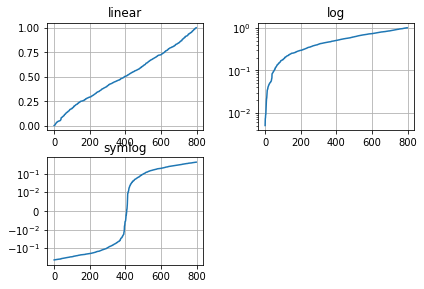

In [16]:
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

In [17]:
y

array([0.00504436, 0.00728387, 0.00768518, 0.00911896, 0.00920089,
       0.01192289, 0.01681631, 0.01864552, 0.02152076, 0.02230702,
       0.0265074 , 0.03097469, 0.03389333, 0.03525355, 0.036207  ,
       0.03641969, 0.04039858, 0.04078897, 0.04212741, 0.044082  ,
       0.04527424, 0.04569632, 0.04586512, 0.04731993, 0.04855783,
       0.04899915, 0.05033653, 0.05068839, 0.05109329, 0.05145323,
       0.05267393, 0.05276156, 0.05415813, 0.05440991, 0.05575641,
       0.05710696, 0.06132671, 0.06381153, 0.06601479, 0.08237102,
       0.08401894, 0.08469221, 0.08625915, 0.08737286, 0.08879503,
       0.08981014, 0.0933174 , 0.09409594, 0.09410292, 0.09617828,
       0.09911762, 0.1009563 , 0.10126327, 0.10306533, 0.105953  ,
       0.10723017, 0.10728408, 0.11338675, 0.11405457, 0.11854221,
       0.11866685, 0.11940473, 0.12032256, 0.12238095, 0.12506999,
       0.12708438, 0.12917316, 0.13388269, 0.13426839, 0.13439671,
       0.13534025, 0.13776302, 0.13969385, 0.14042888, 0.14120

In [18]:
"a"+"b"

'ab'